In [1]:
from keras.layers import Input, Convolution2D, Dense, Activation, Flatten,merge
from keras.layers import  MaxPooling2D, Dropout, LocallyConnected2D
from keras.models import Model, load_model
from keras.optimizers import SGD
from lib.data_wrappers import load_train_data,load_test_data
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [2]:
train,validation = load_train_data('train.csv')

In [3]:
test = load_test_data('test.csv')

In [4]:
test[2][1].shape

(64, 64, 1)

In [5]:
train_labels = train[2][:]
valid_labels = validation[2][:]

In [6]:
def reformat(labels):
    labels = (np.arange(99) == labels[:,None]).astype(np.float32)
    return labels
train_labels = reformat(train_labels)
valid_labels = reformat(valid_labels)


In [7]:
input_layer = Input(shape=(64,64,1))

In [120]:
#current best, log-loss 0.02312 on leader board
#first
pipe = Convolution2D(8, 3, 3, border_mode='same',W_regularizer='l1')(input_layer)
pipe = (Activation('relu'))(pipe)
pipe = (MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))(pipe)

#second 
pipe = (Convolution2D(16, 3, 3, border_mode='same',W_regularizer='l1'))(pipe)
pipe = (Activation('relu'))(pipe)
pipe = (MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))(pipe)


#flatten
pipe= Flatten()(pipe)

# Define the pre-extracted feature input
num = Input(shape=(192,), name='num')
# Concatenate the output of our convnet with our pre-extracted feature input
combined = merge([pipe, num], mode='concat')

#fully connected layer
combined = Dense(100, activation='relu')(combined)
combined = Dropout(.5)(combined)

#output layer
output_layer = Dense(99, activation='softmax')(combined)

In [121]:
sgd = SGD(lr=0.008, momentum=0.9,decay=0.0,nesterov=False)

In [122]:
# for image + numerical data
model = Model(input=[input_layer,num],output=output_layer)

In [124]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',
              metrics=['accuracy'])

In [126]:
# for image+ numerical data
history = model.fit([train[1][:],train[0][:]],train_labels,
                   validation_data=([validation[1][:],validation[0][:]],valid_labels),
                   nb_epoch=100)

Train on 792 samples, validate on 99 samples
Epoch 1/100
792/792 [==============================] - 0s - loss: 0.0720 - acc: 0.9987 - val_loss: 0.0624 - val_acc: 1.0000
Epoch 2/100
792/792 [==============================] - 0s - loss: 0.0752 - acc: 0.9937 - val_loss: 0.0642 - val_acc: 1.0000
Epoch 3/100
792/792 [==============================] - 0s - loss: 0.0841 - acc: 0.9937 - val_loss: 0.0633 - val_acc: 1.0000
Epoch 4/100
792/792 [==============================] - 0s - loss: 0.0851 - acc: 0.9912 - val_loss: 0.0640 - val_acc: 1.0000
Epoch 5/100
792/792 [==============================] - 0s - loss: 0.0740 - acc: 0.9987 - val_loss: 0.0637 - val_acc: 1.0000
Epoch 6/100
792/792 [==============================] - 0s - loss: 0.0794 - acc: 0.9975 - val_loss: 0.0678 - val_acc: 1.0000
Epoch 7/100
792/792 [==============================] - 0s - loss: 0.0762 - acc: 0.9962 - val_loss: 0.0687 - val_acc: 1.0000
Epoch 8/100
792/792 [==============================] - 1s - loss: 0.0747 - acc: 0.9949 

In [103]:
history.model.save('2_CNN_and_pre_connected.h5')

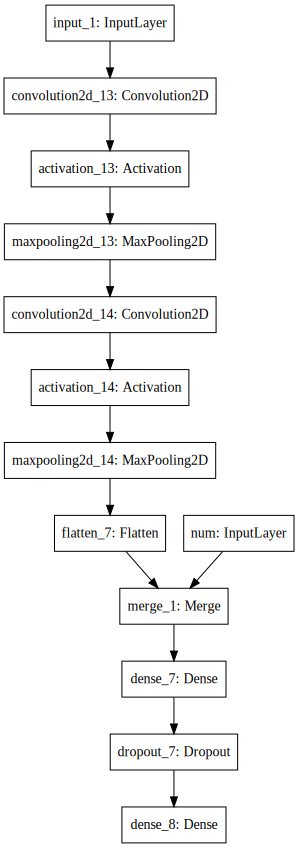

In [104]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(history.model).create(prog='dot', format='svg'))

In [105]:
from keras.utils.visualize_util import plot
#plot(history.model, to_file='1_CNN.h5.png')

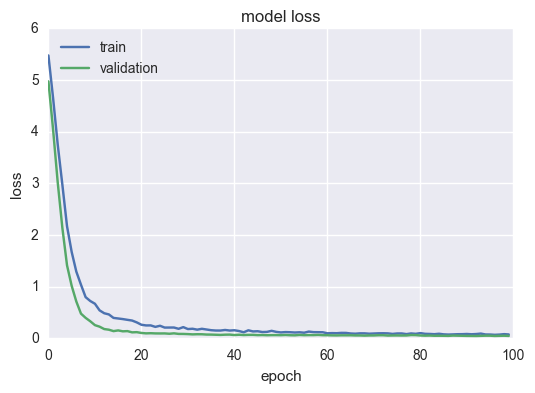

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [95]:
#validation_history_dict = {}

In [107]:
validation_history_dict['2_CNN_and_pre_connected'] = history.history['val_loss']

In [108]:
validation_history_dict.keys()

['2_CNN_and_pre_connected', '2_CN', '5_CN', '1_CN']

In [110]:
import pickle
pickle.dump( validation_history_dict, open( "validation_history_dict.p", "wb" ) )

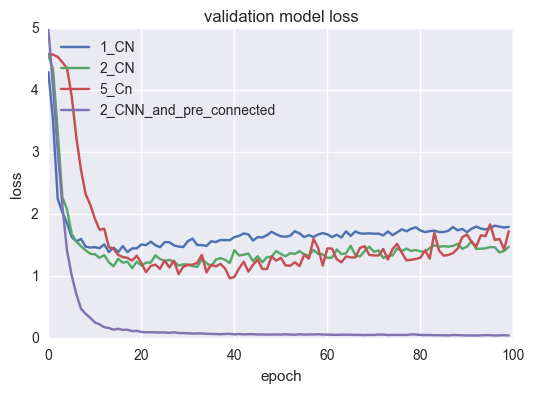

In [114]:
plt.plot(validation_history_dict['1_CN'])
plt.plot(validation_history_dict['2_CN'])
plt.plot(validation_history_dict['5_CN'])
plt.plot(validation_history_dict['2_CNN_and_pre_connected'])
plt.title('validation model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['1_CN', '2_CN','5_Cn', '2_CNN_and_pre_connected'], loc='upper left')

# Viz stuff

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
One_CNN = load_model('saved_models/1_CNN.h5')

In [116]:
data = pickle.load( open( "saved_models/validation_history_dict.p", "rb" ) )

In [118]:
data.keys()

['2_CN', '5_CN', '1_CN', '2_CNN_and_pre_connected']

# Output for Kaggle

In [ ]:
test = load_test_data('test.csv')

In [ ]:
results = history.model.predict([test[2][:],test[1][:]])

In [ ]:
labels = sorted(pd.read_csv('train.csv').species.unique())

In [ ]:
index, test, feature_image = load_test_data('test.csv')

In [ ]:
results_sub = pd.DataFrame(results,index=index,columns=labels)

In [ ]:
#results_sub.to_csv('submit.csv')

In [ ]:
model.summary

In [ ]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(history.model).create(prog='dot', format='svg'))

In [ ]:
layer_dict = dict([(layer.name, layer) for layer in history.model.layers])